<a href="https://colab.research.google.com/github/NithderP/NithderP/blob/main/MachineLearning_Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Homework 3

## Weather forecast Machine Learning Model

Busines question:

How can we leverage our weather forecast model to optimize supply chain and inventory management for retail businesses, particularly those in sectors highly sensitive to weather conditions, such as agriculture and outdoor events?



## Importing necessary libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



## Loading the dataset

### Source : https://www.kaggle.com/datasets/budincsevity/szeged-weather?resource=download



In [2]:


file_path = 'https://raw.githubusercontent.com/NithderP/NithderP/main/weatherHistory.csv'

df = pd.read_csv(file_path)


#df = pd.read_csv("/weatherHistory.csv")
df.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Temperature (C),96453.0,11.932678,9.551546,-21.822222,4.688889,12.0000,18.838889,39.905556
Apparent Temperature (C),96453.0,10.855029,10.696847,-27.716667,2.311111,12.0000,18.838889,39.344444
Humidity,96453.0,0.734899,0.195473,0.000000,0.600000,0.7800,0.890000,1.000000
Wind Speed (km/h),96453.0,10.810640,6.913571,0.000000,5.828200,9.9659,14.135800,63.852600
Wind Bearing (degrees),96453.0,187.509232,107.383428,0.000000,116.000000,180.0000,290.000000,359.000000
Visibility (km),96453.0,10.347325,4.192123,0.000000,8.339800,10.0464,14.812000,16.100000
Loud Cover,96453.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Pressure (millibars),96453.0,1003.235956,116.969906,0.000000,1011.900000,1016.4500,1021.090000,1046.380000


In [ ]:
df.shape

(96453, 12)

In [ ]:
data_types = df.dtypes
data_types

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [ ]:
print(df.isnull().sum())

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


## Changing (variables) columns' name

In [4]:
# Create a dictionary to map old column names to new names
column_mapping = {'Formatted Date': 'date', 'Summary': 'summary', 'Precip Type': 'precipitation', 'Temperature (C)': 'temperature', 'Apparent Temperature (C)': 'apparent_temp', 'Humidity': 'humidity', 'Wind Speed (km/h)': 'windspeed', 'Wind Bearing (degrees)': 'wind_bearing', 'Visibility (km)': 'visibility', 'Loud Cover': 'loud_cover', 'Pressure (millibars)': 'air_pressure', 'Daily Summary': 'daily_summary'}

# Use the rename method to change column names
df.rename(columns=column_mapping, inplace=True)

# Display the DataFrame with updated column names
print(df)

                                date        summary precipitation  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy          rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy          rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy          rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy          rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy          rain   
...                              ...            ...           ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy          rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy          rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy          rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy          rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy          rain   

       temperature  apparent_temp  humidity  windspeed  wind_bearing  \
0         9.472222       7.388889      0.89    14.1197         251.0   
1         9.355556       7.

## Plotting the target variable (temperature)

<ipython-input-5-ca0e6c2b8823>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['temperature'], bins=40, color='blue')


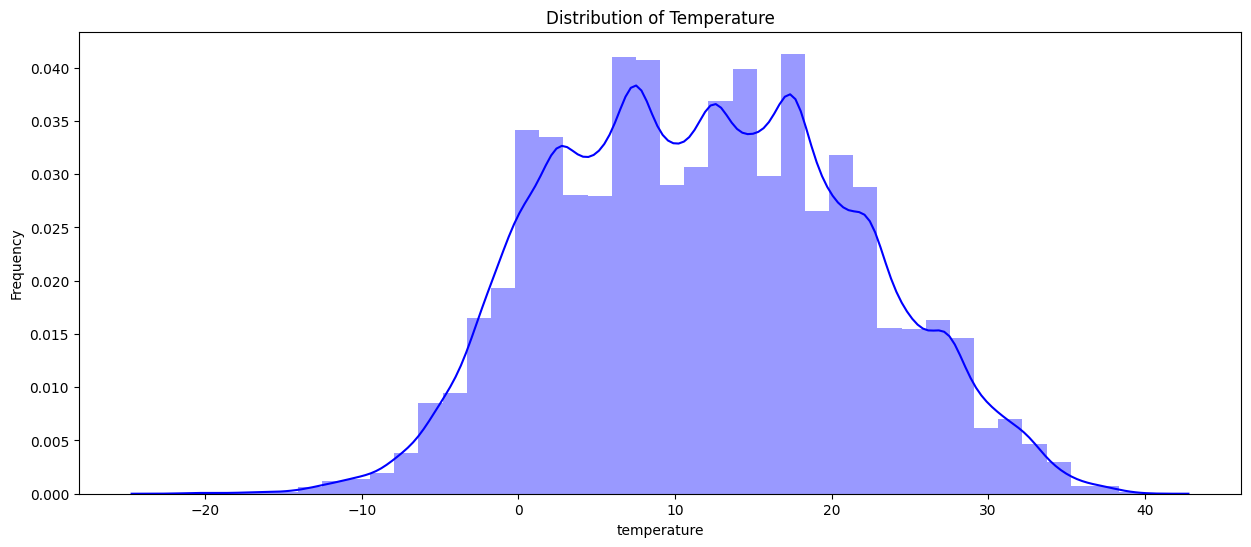

In [5]:
import matplotlib.pyplot as plt
import seaborn as sb

# Adjust the figure size based on your preference
plt.figure(figsize=(15, 6))

# Plot the distribution of 'total_marks'
sb.distplot(df['temperature'], bins=40, color='blue')

# Add labels and title for better clarity
plt.xlabel('temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')

# Show the plot
plt.show()

## Creating a subset of data for the target variable and the most relevant predictive features

According to the National Oceanic and Atmospheric Administration (NOAA), temperature, humidity, precipitation, air pressure, wind speed, and wind direction are key observations of the atmosphere that help forecasters predict the weather.

Source : https://www.noaa.gov/education/resource-collections/weather-atmosphere/weather-observations#:~:text=Temperature%2C%20humidity%2C%20precipitation%2C%20air,first%20weather%20observations%20were%20recorded.


In [6]:
new_df = df[['temperature', 'apparent_temp', 'humidity', 'air_pressure', 'windspeed', 'wind_bearing']]

# Display the subset DataFrame
print(new_df)

       temperature  apparent_temp  humidity  air_pressure  windspeed  \
0         9.472222       7.388889      0.89       1015.13    14.1197   
1         9.355556       7.227778      0.86       1015.63    14.2646   
2         9.377778       9.377778      0.89       1015.94     3.9284   
3         8.288889       5.944444      0.83       1016.41    14.1036   
4         8.755556       6.977778      0.83       1016.51    11.0446   
...            ...            ...       ...           ...        ...   
96448    26.016667      26.016667      0.43       1014.36    10.9963   
96449    24.583333      24.583333      0.48       1015.16    10.0947   
96450    22.038889      22.038889      0.56       1015.66     8.9838   
96451    21.522222      21.522222      0.60       1015.95    10.5294   
96452    20.438889      20.438889      0.61       1016.16     5.8765   

       wind_bearing  
0             251.0  
1             259.0  
2             204.0  
3             269.0  
4             259.0  
...

In [7]:
new_df.head()


,temperature,apparent_temp,humidity,air_pressure,windspeed,wind_bearing
0,9.472222,7.388889,0.89,1015.13,14.1197,251.0
1,9.355556,7.227778,0.86,1015.63,14.2646,259.0
2,9.377778,9.377778,0.89,1015.94,3.9284,204.0
3,8.288889,5.944444,0.83,1016.41,14.1036,269.0
4,8.755556,6.977778,0.83,1016.51,11.0446,259.0


#Plotting the Heatmap

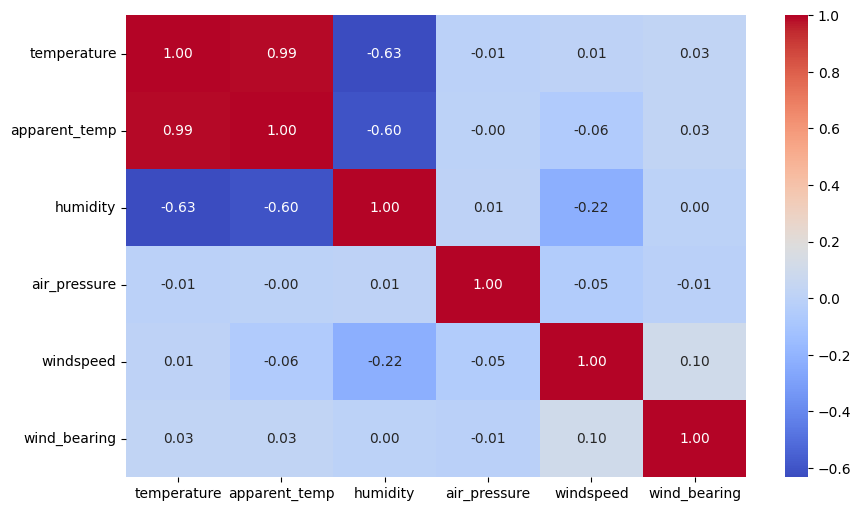

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
corr = new_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=corr.columns, yticklabels=corr.columns)

# Show the plot
plt.show()

## Scaling and normalizing the data

In [ ]:
feature_summary = new_df.describe()

feature_summary

,temperature,humidity,air_pressure,windspeed,wind_bearing
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,0.734899,1003.235956,10.810640,187.509232
std,9.551546,0.195473,116.969906,6.913571,107.383428
min,-21.822222,0.000000,0.000000,0.000000,0.000000
25%,4.688889,0.600000,1011.900000,5.828200,116.000000
50%,12.000000,0.780000,1016.450000,9.965900,180.000000
75%,18.838889,0.890000,1021.090000,14.135800,290.000000
max,39.905556,1.000000,1046.380000,63.852600,359.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df1 = new_df.copy()

# Normalizing a data frame

# pandas:
norm_df = (df1 - df1.mean()) / df1.std()

# scikit-learn:
scaler = StandardScaler()
norm_df = pd.DataFrame(scaler.fit_transform(df1),
                       index=df.index, columns=df1.columns)
# the result of the transformation is a numpy array, we convert it into a dataframe

# Rescaling a data frame
# pandas:
rescaled_df = (df1 - df1.min()) / (df1.max() - df1.min())

# scikit-learn:
scaler = MinMaxScaler()
rescaled_df = pd.DataFrame(scaler.fit_transform(df1),
                       index=df1.index, columns=df1.columns)

## Splitting the data

In [ ]:
# random_state is set to a defined value to get the same partitions when re-running the code
trainData= df1.sample(frac=0.6, random_state=1)
# assign rows that are not already in the training set, into validation
validData = df1.drop(trainData.index)

print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)
print()

# alternative way using scikit-learn
trainData, validData = train_test_split(df1, test_size=0.40, random_state=1)
print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)

Training   :  (57872, 5)
Validation :  (38581, 5)

Training   :  (57871, 5)
Validation :  (38582, 5)


## Partition the dataset into training (50%), validation (30%), and test sets (20%).

In [ ]:
# randomly sample 50% of the row IDs for training
trainData = df1.sample(frac=0.5, random_state=1)
# sample 30% of the row IDs into the validation set, drawing only from records
# not already in the training set; 60% of 50% is 30%
validData = df1.drop(trainData.index).sample(frac=0.6, random_state=1)
# the remaining 20% rows serve as test
testData = df1.drop(trainData.index).drop(validData.index)

print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)
print('Test       : ', testData.shape)
print()

# alternative way using scikit-learn
trainData, temp = train_test_split(df1, test_size=0.5, random_state=1)
validData, testData = train_test_split(temp, test_size=0.4, random_state=1)
print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)
print('Test       : ', testData.shape)

Training   :  (48226, 5)
Validation :  (28936, 5)
Test       :  (19291, 5)

Training   :  (48226, 5)
Validation :  (28936, 5)
Test       :  (19291, 5)


##  Linear Regression  - Constructing a formula excluding the dependent variable (temperature)

In [ ]:
# Data loading and preprocessing

# Rename columns if desired (optional)
df1.columns = [s.strip().replace(' ', '_') for s in df1.columns]

# Proceed with linear regression analysis using df1

excludeColumns = ('temperature')
predictors = [s for s in df1.columns if s not in excludeColumns]
outcome = 'temperature'

# partition data
X = df1[predictors]
y = df1[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

model = LinearRegression()
model.fit(train_X, train_y)

train_pred = model.predict(train_X)
train_results = pd.DataFrame({
    'temperature': train_y,
    'predicted': train_pred,
    'residual': train_y - train_pred
})
print(train_results.head())

       temperature  predicted   residual
92011    15.577778  15.889199  -0.311421
80552     2.222222   7.263226  -5.041004
39255    27.405556  17.686640   9.718916
74136    19.927778   5.682757  14.245021
6689      5.116667  11.468585  -6.351918


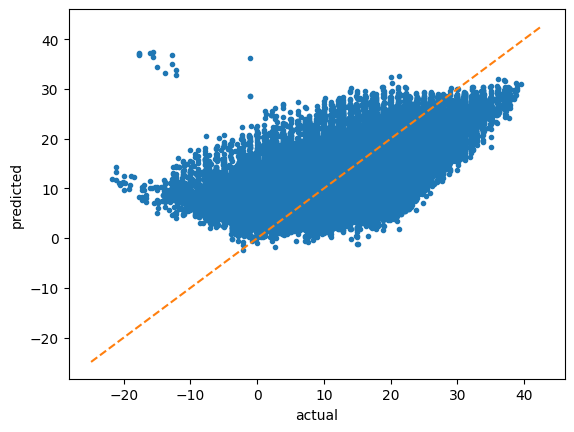

In [ ]:
plt.plot(train_results.temperature, train_results.predicted, '.')
plt.xlabel('actual')  # set x-axis label
plt.ylabel('predicted')  # set y-axis label
axes = plt.gca()
plt.plot(axes.get_xlim(), axes.get_xlim(), '--')
plt.show()

## Predicting the validation data

In [ ]:
valid_pred = model.predict(valid_X)
valid_results = pd.DataFrame({
    'temperature': valid_y,
    'predicted': valid_pred,
    'residual': valid_y - valid_pred
})
print(valid_results.head())

       temperature  predicted   residual
9597     18.938889   9.311130   9.627759
26204    24.122222  21.508258   2.613964
6282     20.088889  16.905255   3.183634
92330    14.466667   3.161485  11.305181
51067     9.716667  12.731085  -3.014418


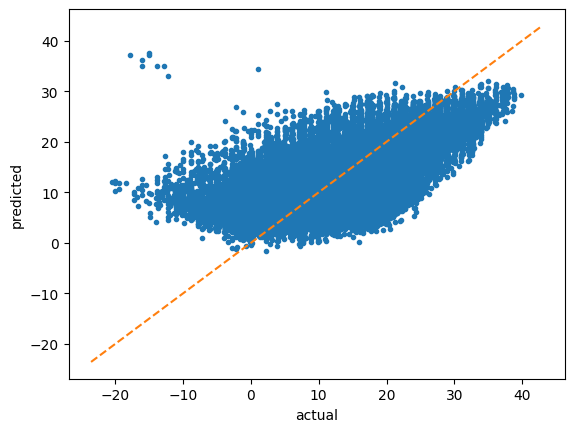

In [ ]:
plt.plot(valid_results.temperature, valid_results.predicted, '.')
plt.xlabel('actual')  # set x-axis label
plt.ylabel('predicted')  # set y-axis label
axes = plt.gca()
plt.plot(axes.get_xlim(), axes.get_xlim(), '--')
plt.show()

## Evaluation metrics

In [ ]:
from sklearn.metrics import r2_score

print('Training set r2: ', r2_score(train_results.temperature, train_results.predicted))
print('Validation set r2: ', r2_score(valid_results.temperature, valid_results.predicted))


Training set r2:  0.41831993422803193
Validation set r2:  0.423918484778385


### Explanation for the R-square

Training set
The linear regression model explains approximately 41.8% of the variance in the temperature (the outcome variable) in the training set. This means that the model captures some of the underlying patterns or relationships in the training data, but it does not explain all the variability. An R-square of such value suggests that there is still a substantial amount of unexplained variance, and the model might not fully capture all the complexities in the data.

Validation set
The linear regression model provides an explanation for roughly 42.4% of the variability observed in the dependent variable within the validation dataset. This consistency between the R-squared values for the training and validation sets is an encouraging indication. It implies that the model's performance is consistent when applied to new, unseen data.

In summary, the linear regression model shows a moderate level of explanatory power, with similar R-square values for both the training and validation sets. While the model captures some of the variance in the data, it does not explain it all, indicating that other factors or variables may influence the outcome.

In [ ]:
pip install scikit-learn

In [ ]:
pip install dmba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 45.0 MB/s eta 0:00:00


In [ ]:
# import the utility function regressionSummary
from dmba import regressionSummary

# training set
regressionSummary(train_results.temperature, train_results.predicted)

# validation set
regressionSummary(valid_results.temperature, valid_results.predicted)


Regression statistics

               Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 7.2753
     Mean Absolute Error (MAE) : 5.8883

Regression statistics

               Mean Error (ME) : 0.0042
Root Mean Squared Error (RMSE) : 7.2636
     Mean Absolute Error (MAE) : 5.8833


### Explanation for the regression statistics

RMSE

For both the training and the validation sets, the RMSE (7.2753 and 7.2636), appears to be a bit high. This suggests that there is still be room for improvement in reducing prediction errors.

MAE

With an MAE of 5.8883 and 5.8833 (training and validation sets), it means that, on average, the model's predictions have an absolute error of approximately 5.89 units in the same scale as the temperature (target variable).







